## Big data analytics: Big Data Bowl 
Authored by Jason Maloney and Jesse Pezzillo

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# This dataset can be downloaded from https://www.kaggle.com/c/nfl-big-data-bowl-2020/data after an agreement is digitally signed through kaggle. 
data = pd.read_csv('train.csv')
#lower all columns
data.columns = map(str.lower, data.columns)

#### Exploratory Data Analysis and cleaning

In [3]:
print(data.dtypes)
# preview a few records
data.head()

gameid                      int64
playid                      int64
team                       object
x                         float64
y                         float64
s                         float64
a                         float64
dis                       float64
orientation               float64
dir                       float64
nflid                       int64
displayname                object
jerseynumber                int64
season                      int64
yardline                    int64
quarter                     int64
gameclock                  object
possessionteam             object
down                        int64
distance                    int64
fieldposition              object
homescorebeforeplay         int64
visitorscorebeforeplay      int64
nflidrusher                 int64
offenseformation           object
offensepersonnel           object
defendersinthebox         float64
defensepersonnel           object
playdirection              object
timehandoff   

,gameid,playid,team,x,y,s,a,dis,orientation,dir,...,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [4]:
# get count of records per year
print(data['season'].value_counts())
# get count of recors per offence formation
print(data['offenseformation'].value_counts())

2017    261800
2018    247962
2019    172392
Name: season, dtype: int64
SINGLEBACK    299728
SHOTGUN       206558
I_FORM        136950
PISTOL         21538
JUMBO          14894
WILDCAT         1694
EMPTY            682
ACE               22
Name: offenseformation, dtype: int64


In [5]:
# create function to convert playerHeight to inches
def heightToInches(x):
    try:
        x,x1 = x.split('-')
        x = int(x)
        x1 = int(x1)
        x = (12*x) + x1
        return(x)
    except:
        return int(x*12)

In [6]:
# run function over column
data["playerheight"] = data["playerheight"].apply(heightToInches)

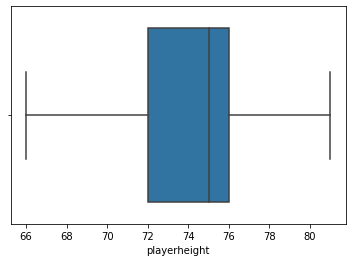

In [7]:
# visualize height distribution
sns.boxplot(data["playerheight"])
plt.show()

In [42]:
# convert TimeHandoff to dates and times
data['timehandoff'] = pd.to_datetime(data['timehandoff'])
data['timesnap'] = pd.to_datetime(data['timesnap'])
data['playerbirthdate'] = pd.to_datetime(data["playerbirthdate"])
# confirm dtype
print('handoff time:',data["timehandoff"].dtype)
print('snap time:',data["timesnap"].dtype)
print('playerbirthdate',data["playerbirthdate"])

handoff time: datetime64[ns, UTC]
snap time: datetime64[ns, UTC]
playerbirthdate 0        1988-12-29
1        1989-03-25
2        1989-01-21
3        1982-11-22
4        1987-08-17
            ...    
682149   1993-11-18
682150   1994-11-06
682151   1995-05-09
682152   1996-05-06
682153   1997-12-22
Name: playerbirthdate, Length: 682154, dtype: datetime64[ns]


In [68]:
# generate age of each player
def birthDayCalc(df):
    birthDay = df[0].year
    timeHandoff = df[1].year
    daysOfAge = (timeHandoff - birthDay) #/ 365.25
    return daysOfAge
data["age"] = data[["playerbirthdate","timehandoff"]].apply(birthDayCalc, axis=1)

In [69]:
data["age"]

0         0.079398
1         0.076660
2         0.076660
3         0.095825
4         0.082136
            ...   
682149    0.071184
682150    0.068446
682151    0.065708
682152    0.062971
682153    0.060233
Name: age, Length: 682154, dtype: float64

In [9]:
# get age of each player
# convert PlayerBirthDate to datetime
data['playerbirthdate'] = pd.to_datetime(data['playerbirthdate'])
data['playerage'] = 0
# age = year of handoff - year of birth
data['playerage'] = data.apply(lambda row: row['timehandoff'].year - row['playerbirthdate'].year, axis = 1)

KeyboardInterrupt: 

In [9]:
# convert windspeed
def windConvert(x):
    try:
        x = re.match('[0-9]+',x)
        x = x.groups()
        for i in x:
            y += i
            return(y)
    except:
        return(x)
data["windspeed"] = data["windspeed"].map(windConvert)

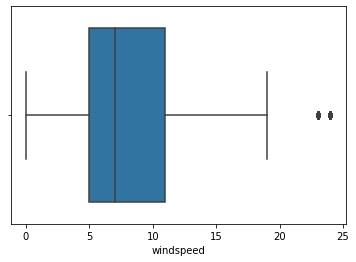

In [10]:
sns.boxplot(data["windspeed"])
plt.show()

In [10]:
# create a rusher dummy variable
data['rusher'] = 0
data['rusher'][data['nflid'] == data['nflidrusher']] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


There is probably a better way to do this, but I got it to work. Created a df for all the rusher's (x,y) position. Repeat each value 22 times (1 time per player per play). Add this column to the main df. Find the distance of each player to the rusher.

In [12]:
# get Rusher X and Y
pos_df = pd.DataFrame(zip(data['x'][data['rusher'] == 1], data['y'][data['rusher'] == 1]), columns = ['x', 'y'])
pos_df.head()

,x,y
0,78.75,30.53
1,71.07,27.16
2,48.66,19.11
3,15.53,25.36
4,29.99,27.12


In [13]:
# need to get each value repeated 22 times, for each player in each play
posdf = pd.DataFrame(zip(pos_df['x'].repeat(22), pos_df['y'].repeat(22)), index = range(len(data)), columns = ['rushx', 'rushy'])
# put the rushX and rushY in the main df
data['rushx'] = posdf['rushx']
data['rushy'] = posdf['rushy']

In [14]:
# euclidean dist = sqrt((x1 - x2)^2 + (y1 - y2)^2) - straight line distance
data['disttorush'] = np.sqrt((data['x'] - data['rushx'])**2 + (data['y'] - data['rushy'])**2)
data.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,...,gameweather,temperature,humidity,windspeed,winddirection,playerage,rusher,rushx,rushy,disttorush
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,Clear and warm,63.0,77.0,8,SW,29,0,78.75,30.53,6.480872
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,Clear and warm,63.0,77.0,8,SW,28,0,78.75,30.53,4.593310
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,Clear and warm,63.0,77.0,8,SW,28,0,78.75,30.53,5.448982
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,Clear and warm,63.0,77.0,8,SW,35,0,78.75,30.53,7.820038
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,Clear and warm,63.0,77.0,8,SW,30,0,78.75,30.53,10.622476


In [11]:
# create a rusher dummy variable
# What are you trying to do here? -Jesse
#rusher = []
#for i in range(len(subset)):
#    if subset['NflId'][i] == subset['NflIdRusher'][i]:
#        rusher.append(1)
#    else:
#        rusher.append(0)

NameError: name 'subset' is not defined

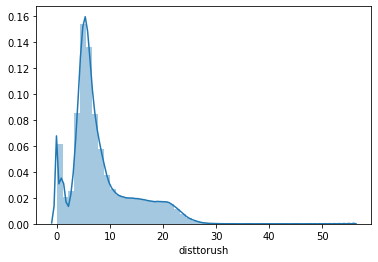

In [15]:
sns.distplot(data['disttorush'])

In [16]:
data.columns

Index(['gameid', 'playid', 'team', 'x', 'y', 's', 'a', 'dis', 'orientation',
       'dir', 'nflid', 'displayname', 'jerseynumber', 'season', 'yardline',
       'quarter', 'gameclock', 'possessionteam', 'down', 'distance',
       'fieldposition', 'homescorebeforeplay', 'visitorscorebeforeplay',
       'nflidrusher', 'offenseformation', 'offensepersonnel',
       'defendersinthebox', 'defensepersonnel', 'playdirection', 'timehandoff',
       'timesnap', 'yards', 'playerheight', 'playerweight', 'playerbirthdate',
       'playercollegename', 'position', 'hometeamabbr', 'visitorteamabbr',
       'week', 'stadium', 'location', 'stadiumtype', 'turf', 'gameweather',
       'temperature', 'humidity', 'windspeed', 'winddirection', 'playerage',
       'rusher', 'rushx', 'rushy', 'disttorush'],
      dtype='object')

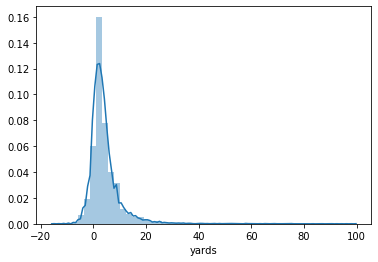

In [17]:
sns.distplot(data['yards'])

In [ ]:
# most general form for offense
# not quite sure how to go about this, if we even do...maybe just leave it categorical
# QB - OL - RB - TE - WR - defensive (oDB, oDL, oLB)

# split up each entry
# create a new list where each entry is QB [0] - OL[1] - RB [2] - TE [3] - WR [4]
# TRY TO DO IT WITHOUT FOR LOOPS

In [17]:
# find the count of each position
# convert to int
# store
#ol = []
#rb = []
#te = []
#wr = []
#for pers in oi:
    # this finds the numbers - all personnel in the same order OL RB TE WR 
    # stores the number as a string
#    val = re.findall('\d', pers)
    # convert to an int and store
#    ol.append(int(val[0]))
#    rb.append(int(val[1]))
#    te.append(int(val[2]))
#    wr.append(int(val[3]))

# in the future - values of 0 OL = 11 - (sum(wr,rb,te)+1(qb))

In [16]:
# split at the comma - OL RB TE WR
#oi = []
#for i in range(len(subset)):
#    op = subset['OffensePersonnel'][i]
#    if 'OL' not in op:
#        newofper = '0 OL, ' + op
#    else:
#        newofper = subset['OffensePersonnel'][i]
#    oi.append(newofper)
#oi.head()


In [18]:
# do the same for defense
# what are the positions?
#set(subset['DefensePersonnel'])
# no missing values, so just need to get the digits
# order is DL LB DB
#dl = []
#lb = []
#db = []
#for pers in subset['DefensePersonnel']:
#   val = re.findall('\d', pers)
#    # dl = val[0], lb = val[1], db = val[2]
#    dl.append(int(val[0]))
#    lb.append(int(val[1]))
#    db.append(int(val[2]))